### Here let's go through an example where we have a spatially inhomogenous data 

Similar to spatially adaptive splines we can preset our difference matrix for better performance

In [4]:
import sys

sys.path.append("../")
sys.path.append("../../")

import numpy as np
from matplotlib import pyplot as plt

from estimators.trend_filtering.trend_filter import Trend_Filter
from estimators.cv_base_estimator import cv_base_estimator

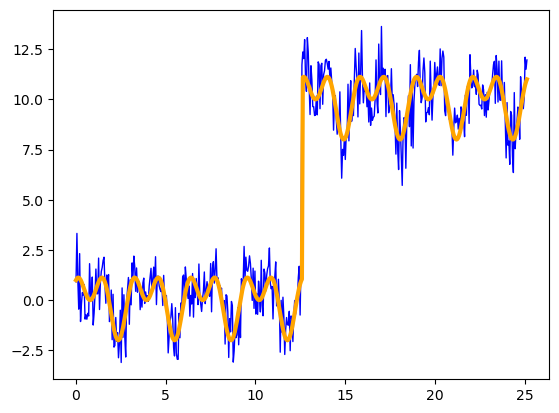

In [6]:
def generate_spatially_inhomogenous_data():

    # generate data
    n = 250

    x = np.zeros( 2 * n)

        # generate time
    t = np.linspace(0, 8*np.pi, 2 * n)
    t1=t[0:n]
    t2=t[n:2*n]
    t3=t[2*n:3*n]

    # generate spatially inhomogenous data
    # x[0:n] = np.sin(4*t1) + np.random.normal(0, 0.5, n)+1
    # x[n:2*n] = 3*np.sin(2*t2) + np.random.normal(0, 1.25, n)+2
    # x[2*n:3*n] = 0.5*np.sin(2*t3) + np.random.normal(0, 0.7, n)-0.25*t3+6

    x[0:n] = np.sin(2*t1) +np.cos(4*t1)+ np.random.normal(0, 1, n)
    x[n:2*n] = np.sin(2*t2) + np.cos(4*t2)+np.random.normal(0, 1, n)+10




    true_fun=np.sin(2*t) +np.cos(4*t)+10*(t>t[250])


    return x, t, true_fun
    

x,t,true_fun=generate_spatially_inhomogenous_data()

plt.plot(t,x,color='blue',lw=1)
plt.plot(t,true_fun,color='orange',lw=3)





### Piecewise Linear Comparison

In [7]:
tf=Trend_Filter(t,x,1,'primal_dual')

cv_base_estimator(tf)

Performing  0 out of 3 iterations of cross validation
Performing cross validation for lambda = 0.7753179702145668
Performing cross validation for lambda = 1.496904644255635
Performing cross validation for lambda = 2.890070397019143
Performing cross validation for lambda = 5.5798523518375776
Performing cross validation for lambda = 10.773008263196669
Performing cross validation for lambda = 20.79942258699429
Performing cross validation for lambda = 40.157397950792884
Performing cross validation for lambda = 77.53179702145668
Performing cross validation for lambda = 149.6904644255635
Performing cross validation for lambda = 289.0070397019143
Performing cross validation for lambda = 557.9852351837571
Performing cross validation for lambda = 1077.3008263196668
Performing cross validation for lambda = 2079.942258699429
Performing cross validation for lambda = 4015.7397950792842
Performing cross validation for lambda = 7753.179702145668
Performing  1 out of 3 iterations of cross validation
P

{'lambda_': 0.44607806736186467}

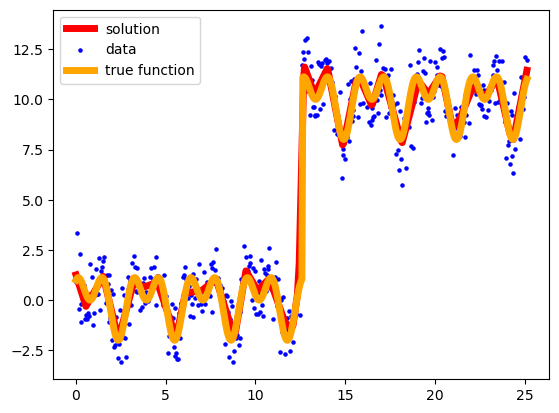

In [9]:


sol=tf.y_hat

plt.plot(t,sol,label='solution',color='red',lw=5)
plt.scatter(t,x,label='data',color='blue',s=5)
plt.plot(t,true_fun,label='true function',color='orange',lw=5)
plt.legend()


### Second Order Comparison

In [11]:
tf2=Trend_Filter(t,x,2,'primal_dual')

cv_base_estimator(tf2)


Performing  0 out of 3 iterations of cross validation
Performing cross validation for lambda = 114.69658524809762
Performing cross validation for lambda = 221.44443664916608
Performing cross validation for lambda = 427.5422709123756
Performing cross validation for lambda = 825.4548914521115
Performing cross validation for lambda = 1593.703884222161
Performing cross validation for lambda = 3076.9604697801396
Performing cross validation for lambda = 5940.680590868058
Performing cross validation for lambda = 11469.658524809762
Performing cross validation for lambda = 22144.44366491661
Performing cross validation for lambda = 42754.22709123756
Performing cross validation for lambda = 82545.48914521106
Performing cross validation for lambda = 159370.3884222161
Performing cross validation for lambda = 307696.046978014
Performing cross validation for lambda = 594068.0590868052
Performing cross validation for lambda = 1146965.8524809761
Performing  1 out of 3 iterations of cross validation
Per

{'lambda_': 41.599104123715904}

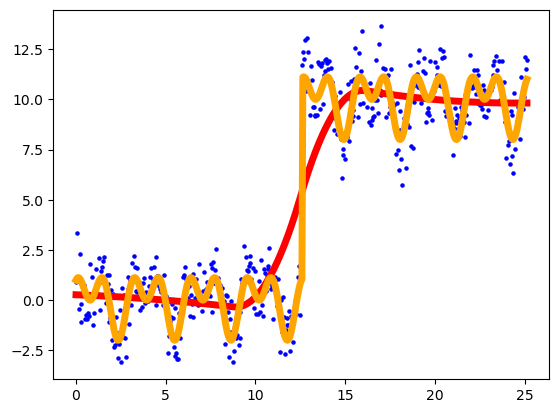

In [12]:


sol=tf2.y_hat

plt.plot(t,sol,label='solution',color='red',lw=5)
plt.scatter(t,x,label='data',color='blue',s=5)
plt.plot(t,true_fun,label='true function',color='orange',lw=5)


### Calibration of Adaptive Weighting Scheme